In [114]:
# enumerate the users
users = [{"id":1, "name":"Daniel"},
         {"id":2, "name":"Jennifer"},
         {"id":3, "name":"Andrew"},
         {"id":4, "name":"Rachel"},
         {"id":5, "name":"Alfred"},
         {"id":6, "name":"Klie"},
         {"id":7, "name":"Tyler"},
         {"id":8, "name":"Trevor"},
         {"id":9, "name":"Remi"},
         {"id":10, "name":"Jonathan"}
        ]
# establish the relationships
relationships = [(0,1),(1,4),(1,5),(5,2),
               (5,6),(5,7),(5,8),(8,7),
               (7,9),(6,4),(6,3)
              ]

In [115]:
# adding friends to users
for user in users:
    user["friends"] = []

# connecting friends
for i,j in relationships:
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

In [117]:
# number of relationships for arbitrary user
def num_of_friends(user):
    return len(user['friends'])

# total number of relationships
total_relationships = sum(num_of_friends(user) for user in users)
avg_relationships = total_relationships/len(users)

print(total_relationships)
print(avg_relationships)

22
2.2


In [119]:
# calculate the numb of friends by id
tuplee_id_friends = [(user["id"], num_of_friends(user)) for user in users]
x = [i for i,j in tuplee_id_friends]
y = [j for i,j in tuplee_id_friends]
print(x,y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [1, 3, 1, 1, 2, 5, 3, 3, 2, 1]


In [80]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

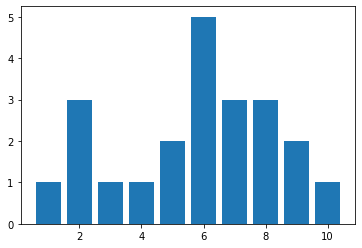

In [82]:
plt.bar(x,y)

In [120]:
def foaf_bad(user):
    return [foaf['id'] for friend in user['friends']
           for foaf in friend['friends']]

def different(user, otheruser):
    return user['id'] != otheruser['id']

def not_friends(user, otheruser):
    return all(different(friend,otheruser) for friend in user['friends'])

def foaf_good(user):
    return (foaf['id'] 
           for friend in user['friends']
           for foaf in friend['friends']
           if different(user,foaf) and not_friends(user,foaf))

In [121]:
interests = [(10,"Hadoop"), (10,"Big Data"), (10, "HBase"), (10, "JAVA"), 
             (10, "Spark"), (10,"Storm"), (10, "Cassandra"), (1, "Spark"), 
             (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"), (1,"Postgres"),
             (1, "Python"), (1, "NoSQL"), (2,"Python"), (2, "scikit-learn"), 
             (2,"scipy"), (2, "statmodels"), (2, "pandas"), (3, "R"), (3, "Python"), (3, "statistics"), 
             (3, "regression"), (3, "probability"), (4, "machine leanring"), (4, "regression"), 
             (4, "decision trees"), (4, "libsvm"), (5, "Python"), (5, "R"), (5, "JAVA"), (5, "C++"),
             (5, "Haskell"), (5, "programming language"), (6, "statitistics"), (6, "probability"), (6, "mathematics"), 
             (6,"theory"), (7, "machine learning"), (7, "scikit-learn"), (7, "mahout"), (7, "neural network"),
             (8, "neural network"), (8, "deep learning"), (8,"Big data"), (8, "artificial intelligence"), (9, "hadoop"), 
             (9, "JAVA"), (9, "mapreduce"),(9, "Big data") 
            ] 

In [126]:
# all the students that like similar topics
def data_scientists_who_like(target):
   return [idd 
           for idd, interest in interests
            if interest == target]
data_scientists_who_like("machine learning")

[7]

In [129]:
from collections import defaultdict

#keys are interests, values are list of ids
dic_flip = defaultdict(list)
for user, interest in interests:
    dic_flip[interest].append(user)

#keys are interests, values are list of ids
dic_flop = defaultdict(list)
for user, interest in interests:
    dic_flop[user].append(interest)

print(dic_flip, dic_flop)

defaultdict(<class 'list'>, {'Hadoop': [10], 'Big Data': [10], 'HBase': [10, 1], 'JAVA': [10, 5, 9], 'Spark': [10, 1], 'Storm': [10], 'Cassandra': [10, 1], 'MongoDB': [1], 'Postgres': [1], 'Python': [1, 2, 3, 5], 'NoSQL': [1], 'scikit-learn': [2, 7], 'scipy': [2], 'statmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3], 'regression': [3, 4], 'probability': [3, 6], 'machine leanring': [4], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming language': [5], 'statitistics': [6], 'mathematics': [6], 'theory': [6], 'machine learning': [7], 'mahout': [7], 'neural network': [7, 8], 'deep learning': [8], 'Big data': [8, 9], 'artificial intelligence': [8], 'hadoop': [9], 'mapreduce': [9]}) defaultdict(<class 'list'>, {10: ['Hadoop', 'Big Data', 'HBase', 'JAVA', 'Spark', 'Storm', 'Cassandra'], 1: ['Spark', 'MongoDB', 'Cassandra', 'HBase', 'Postgres', 'Python', 'NoSQL'], 2: ['Python', 'scikit-learn', 'scipy', 'statmodels', 'pandas'], 3: ['R', 'Python', 'statist

Text(0.5, 1.0, 'Common technology used by students')

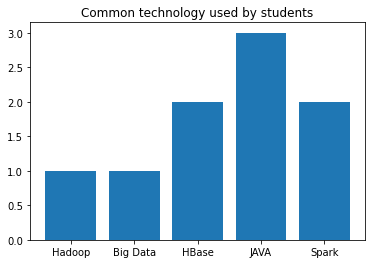

In [103]:
plt.bar(list(dic_flip.keys())[0:5], [len(dic_flip[k]) for k in list(dic_flip.keys())[0:5]])
plt.title('Common technology used by students')

In [130]:
def most_common_interest_with_1 (user):
    for interest in dic_flop[user]:
        for interested_user in dic_flip[interest]:
            if user['id']!= interested_user['id']:
                Counter(interested_user)
def most_common_interest_with_2 (user):
    return Counter(interested_user 
                   for interest in dic_flop[user]
                   for interested_user in dic_flip[interest]
                   if user['id'] != interested_user['id'])

In [131]:
most_common_interest_with_2 ()

NameError: name 'Counter' is not defined